# Demo of the evolution model

The code in [amitosis.py](amitosis.py) and in this notebook was last tested with:

* python version 3.7.12
* numpy 1.20.3
* scipy 1.7.0
* pandas 1.3.5
* matplotlib 3.4.2
* seaborn 0.11.1

Below we illustrate how to conduct the evolutionary simulations used to generate Figure 5.
We use 10 replicate populations here but 100 in the paper.

In [1]:
run amitosis

In [10]:
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('ticks')
sns.set_context('talk')

In [12]:
red = sns.xkcd_rgb['pale red']
gre = sns.xkcd_rgb['light green'] 

## Parameters

* Genomic mutation rate: $U = 0.03$
* Beneficial effect of a mutation: $s = 0.03$
* Population size: $N=3000$
* Number of replicate populations: 10
* Number of fitness loci: $L=200$
* Number of loci fixed for a beneficial mutation: $K = 5$

In [5]:
nReps = 10
N = 3000
L = 200
c = 45
U = .03
s = .03

## Parental population

Implements $K=5$.

In [6]:

pop = Populations(nReps=nReps, N=N, nLoci=L, ploidy=c, genomic_mu=U, selcoef=s, amitosis=True)
for i in range(nReps):
    for j in range(5):  
        pop.soma[i,:,j] += 45
pop.get_fitness()
pop.collect_data()
par_data = pop.evolve(1000, 10) 
par_data

,generation,fitness_mean,fitness_std,nReps,N,nLoci,ploidy,genomic_mu,selcoef,amitosis
0,0,1.159274,0.000000,10,3000,200,45,0.03,0.03,True
1,10,1.159505,0.000030,10,3000,200,45,0.03,0.03,True
2,20,1.159688,0.000050,10,3000,200,45,0.03,0.03,True
3,30,1.159933,0.000127,10,3000,200,45,0.03,0.03,True
4,40,1.160271,0.000167,10,3000,200,45,0.03,0.03,True
...,...,...,...,...,...,...,...,...,...,...
96,960,1.568476,0.064178,10,3000,200,45,0.03,0.03,True
97,970,1.575340,0.063336,10,3000,200,45,0.03,0.03,True
98,980,1.581325,0.062030,10,3000,200,45,0.03,0.03,True
99,990,1.588359,0.060814,10,3000,200,45,0.03,0.03,True


## Progeny population

Implements $K = 5$ at non-overlapping loci for the two parents resulting in 10
loci with 22 and 23 beneficial alleles (5 of each).

In [7]:
pop = Populations(nReps=nReps, N=N, nLoci=L, ploidy=c, genomic_mu=U, selcoef=s, amitosis=True)
for i in range(nReps):
    for j in range(5):  
        pop.soma[i,:,j] += 22
    for j in range(5, 10):  
        pop.soma[i,:,j] += 23
pop.get_fitness()
pop.collect_data()
pro_data = pop.evolve(1000, 10) 
pro_data

,generation,fitness_mean,fitness_std,nReps,N,nLoci,ploidy,genomic_mu,selcoef,amitosis
0,0,1.160540,0.000000,10,3000,200,45,0.03,0.03,True
1,10,1.162032,0.000749,10,3000,200,45,0.03,0.03,True
2,20,1.166153,0.001575,10,3000,200,45,0.03,0.03,True
3,30,1.172775,0.002236,10,3000,200,45,0.03,0.03,True
4,40,1.181290,0.003430,10,3000,200,45,0.03,0.03,True
...,...,...,...,...,...,...,...,...,...,...
96,960,1.827294,0.100524,10,3000,200,45,0.03,0.03,True
97,970,1.835279,0.102031,10,3000,200,45,0.03,0.03,True
98,980,1.842387,0.102515,10,3000,200,45,0.03,0.03,True
99,990,1.850005,0.103324,10,3000,200,45,0.03,0.03,True


## Plot

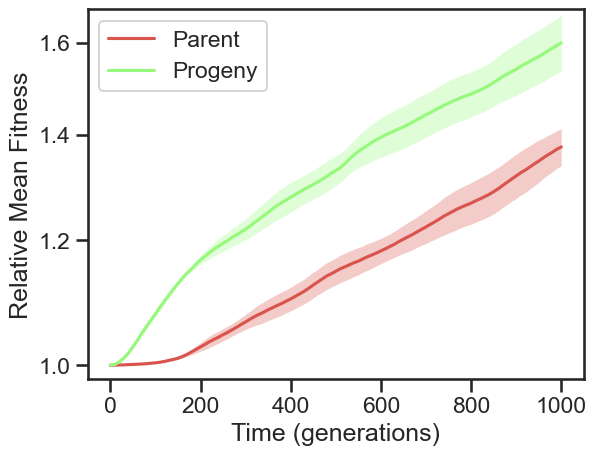

In [23]:
w1 = par_data['fitness_mean'] / par_data['fitness_mean'][0]
w2 = pro_data['fitness_mean'] / pro_data['fitness_mean'][0]
rv = t(nReps-1)
tq = rv.ppf(.975)
w1ci = tq * (par_data['fitness_std'] / par_data['fitness_mean'][0]) / np.sqrt(nReps)
w2ci = tq * (pro_data['fitness_std'] / pro_data['fitness_mean'][0]) / np.sqrt(nReps) 
plt.semilogy(par_data['generation'], w1, label='Parent', color=red)
plt.fill_between(par_data['generation'], w1 - w1ci, w1 + w1ci, alpha=.3, color=red, lw=.001)
plt.plot(pro_data['generation'], w2, label='Progeny', color=gre)
plt.fill_between(pro_data['generation'], w2 - w2ci, w2 + w2ci, alpha=.3, color=gre, lw=.001)
plt.yticks(ticks=np.arange(1, 1.61, .2), labels=np.arange(1, 1.61, .2).round(2))
plt.ylim(.98, 1.68)
plt.minorticks_off()
plt.ylabel('Relative Mean Fitness')
plt.xlabel('Time (generations)')
plt.legend();